# Meta Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.It is designed to se automatically find a good set of hyperparameters for the model in an effort to make forrecast for time series with seasonality and trends. 

The Prophet model is not autoregressive, like ARIMA, exponential smoothing, and the other methods we study in a typical time series course (including my own).

The 3 components are:

1. The trend g(t) which can be either linear or logistic.  
2. The seasonality s(t), modeled using a Fourier series.  
3. The holiday component h(t), which is essentially a one-hot vector “dotted” with a vector of weights, each representing the contribution from their respective holiday.  

In this notebook, following concepts are covered:  
- Loading time-series  
- EDA  
- Preparing the data for modeling  
- Implementing prophet model  
- Evaluating the results  

Data: https://www.kaggle.com/datasets/bobnau/daily-website-visitors  
Install prophet: `pip install prophet`  


Special thanks to Zohoor Nezhad Halafi for contributing this notebook! Connect with her on [LinkedIn](https://www.linkedin.com/in/zohoor-nezhad-halafi/).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(16,8)})

## Loading time series

In [2]:
data = pd.read_csv(r'C:\Users\jinlei\Documents\2023\mikekeith52\data\daily-website-visitors.csv',parse_dates=['Date'])

In [3]:
data=data[['First.Time.Visits','Date']]

In [4]:
data.head()

,First.Time.Visits,Date
0,1430,2014-09-14
1,2297,2014-09-15
2,2352,2014-09-16
3,2327,2014-09-17
4,2130,2014-09-18


## EDA

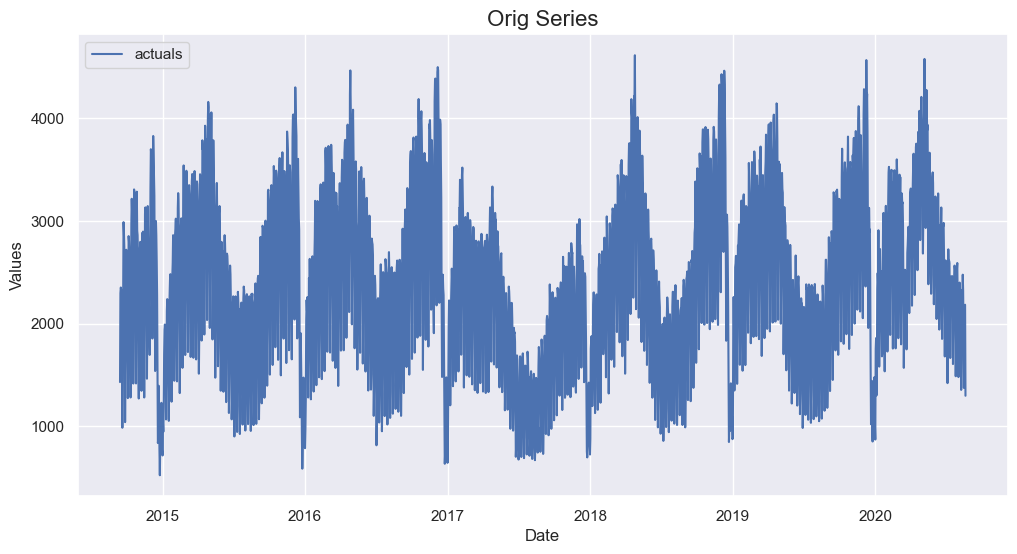

In [5]:
f=Forecaster(y=data['First.Time.Visits'],current_dates=data['Date'])
f.plot()
plt.title('Orig Series',size=16)
plt.show()

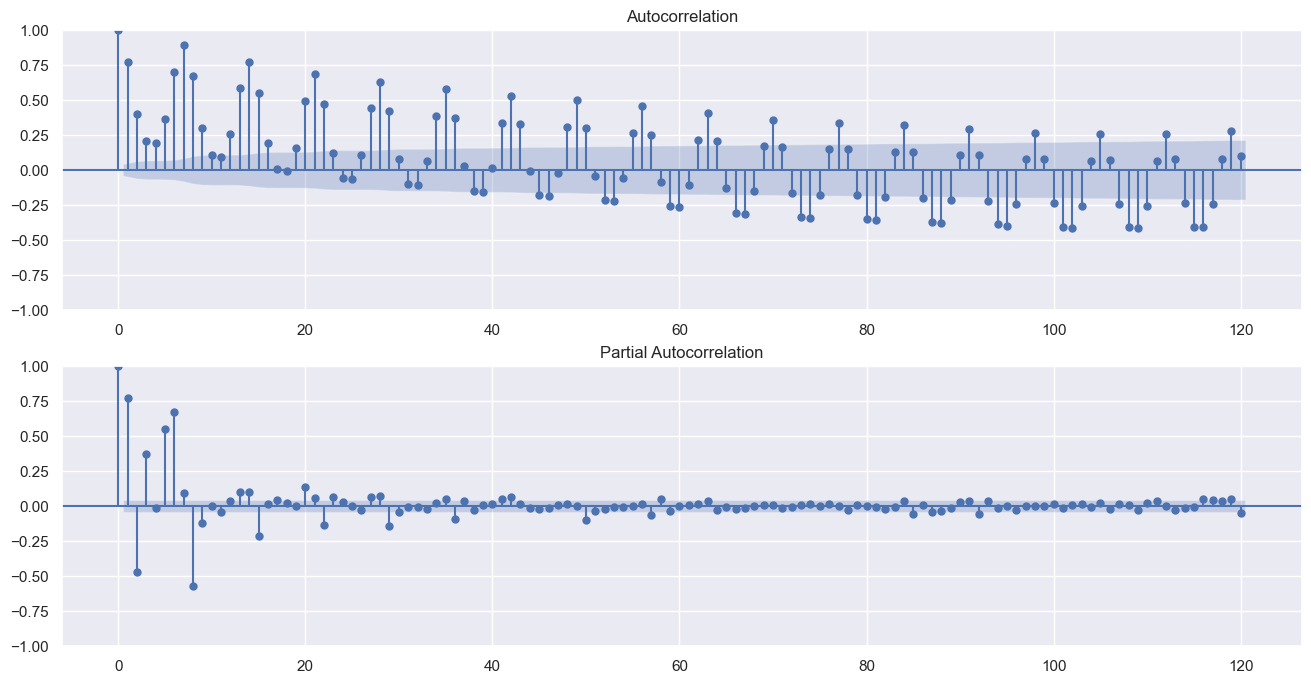

In [6]:
figs, axs = plt.subplots(2, 1)
f.plot_acf(ax=axs[0],lags=120)
f.plot_pacf(ax=axs[1],lags=120)
plt.show()

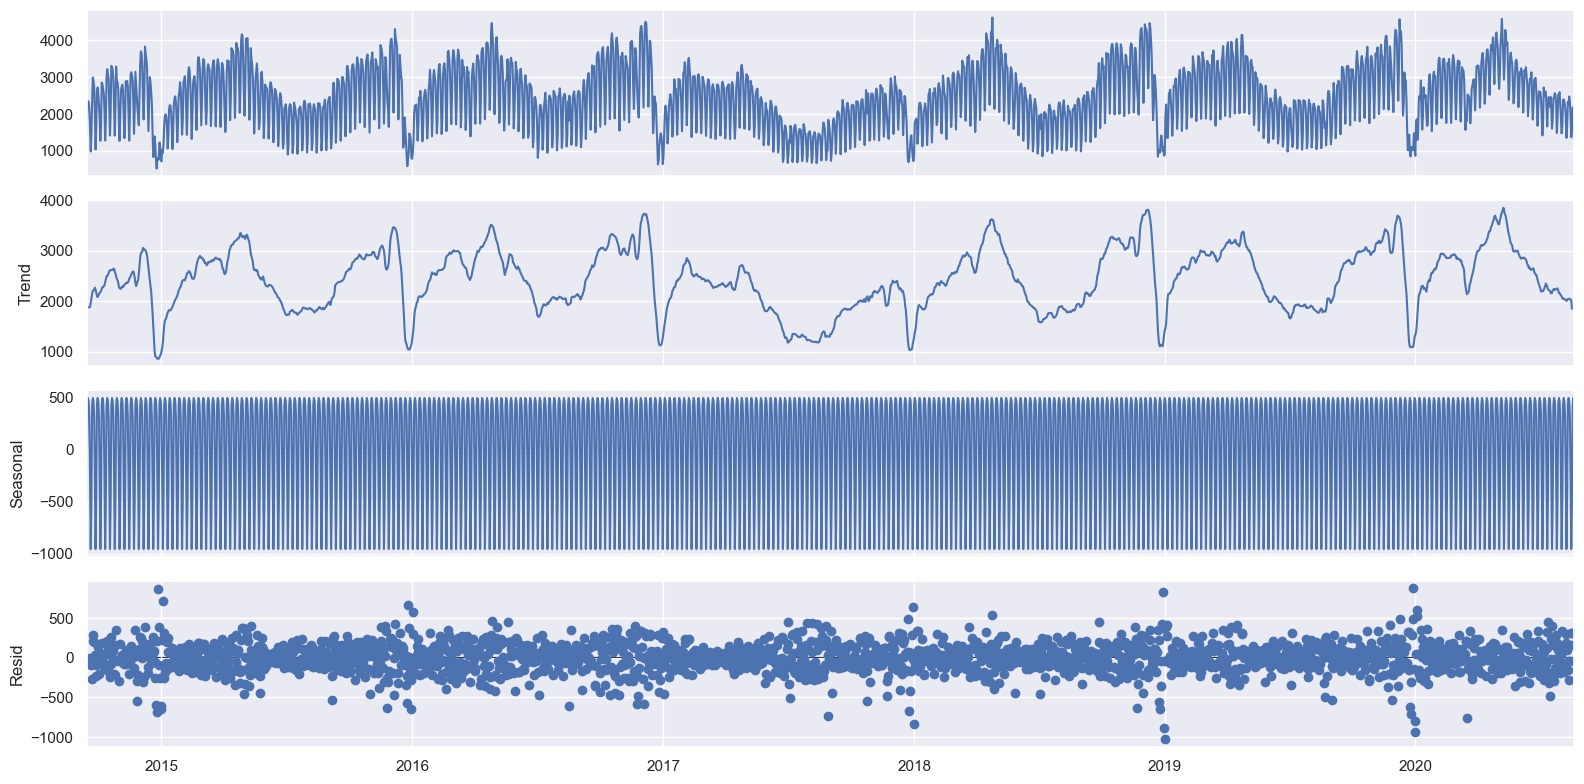

In [7]:
f.seasonal_decompose().plot()
plt.show()

ADF Test

In [8]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -4.48
the p-value is 0.0002
the series is stationary
----------------------------------------------------------------------------------------------------


## Preparing the data for modeling

In [9]:
f.generate_future_dates(60)
f.set_test_length(.2)
f.set_estimator('prophet')
f

Forecaster(
    DateStartActuals=2014-09-14T00:00:00.000000000
    DateEndActuals=2020-08-19T00:00:00.000000000
    Freq=D
    N_actuals=2167
    ForecastLength=60
    Xvars=[]
    TestLength=433
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=prophet
    GridsFile=Grids
)

## Forecasting

In [10]:
f.manual_forecast(call_me='prophet1')

13:55:52 - cmdstanpy - INFO - Chain [1] start processing
13:55:54 - cmdstanpy - INFO - Chain [1] done processing
13:55:55 - cmdstanpy - INFO - Chain [1] start processing
13:55:56 - cmdstanpy - INFO - Chain [1] done processing


C:\ProgramData\Anaconda3\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for prophet1. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


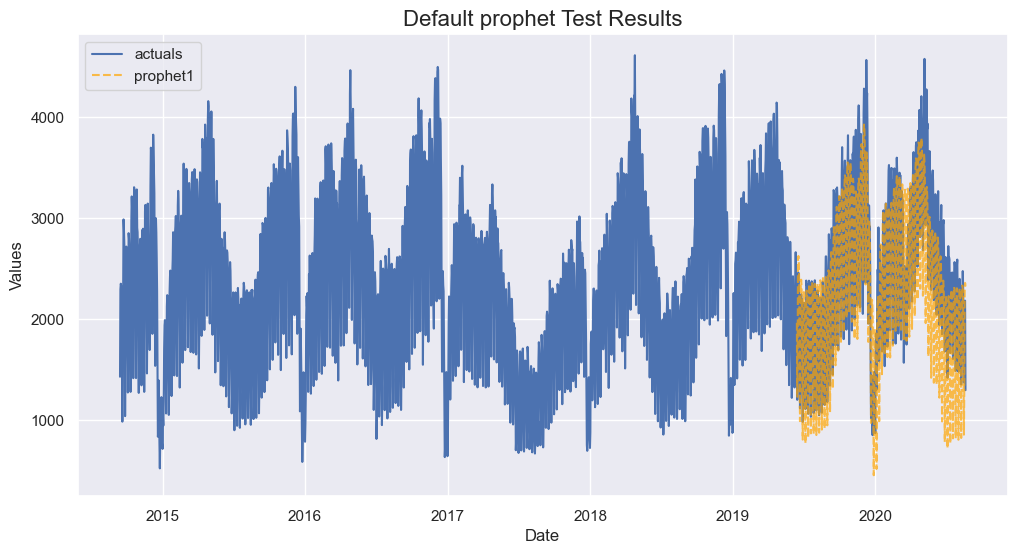

In [11]:
f.plot_test_set(ci=True,models='prophet1')
plt.title('Default prophet Test Results',size=16)
plt.show()

In [12]:
results = f.export('model_summaries')
results[['TestSetRMSE','InSampleRMSE','TestSetMAPE','InSampleMAPE']]

,TestSetRMSE,InSampleRMSE,TestSetMAPE,InSampleMAPE
0,402.434762,282.781766,0.135875,0.104143


C:\ProgramData\Anaconda3\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for prophet1. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


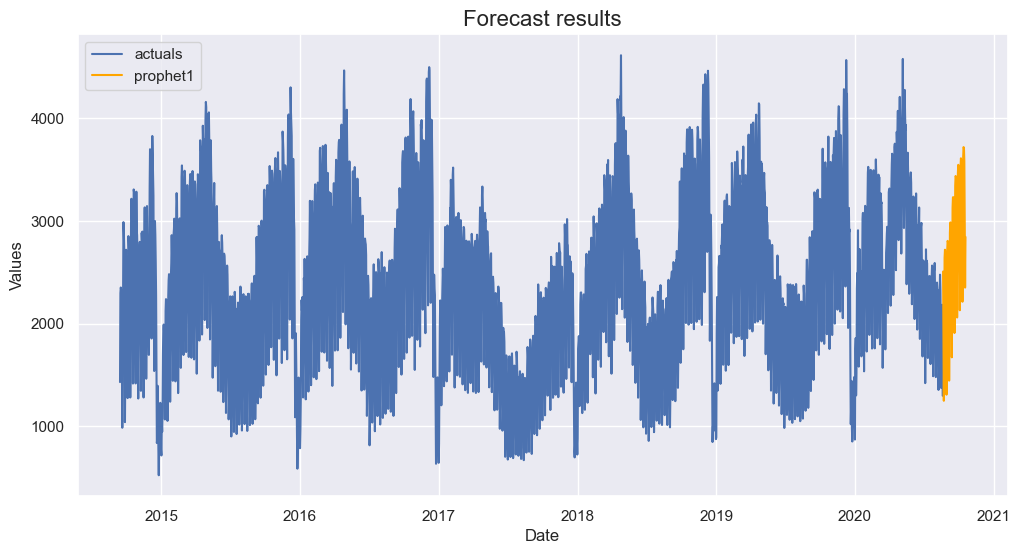

In [13]:
f.plot(ci=True,models='prophet1')
plt.title('Forecast results',size=16)
plt.show()

In [14]:
f

Forecaster(
    DateStartActuals=2014-09-14T00:00:00.000000000
    DateEndActuals=2020-08-19T00:00:00.000000000
    Freq=D
    N_actuals=2167
    ForecastLength=60
    Xvars=[]
    TestLength=433
    ValidationMetric=rmse
    ForecastsEvaluated=['prophet1']
    CILevel=None
    CurrentEstimator=prophet
    GridsFile=Grids
)

In [15]:
f.export()

{'model_summaries':   ModelNickname Estimator Xvars HyperParams  Observations  DynamicallyTested  \
 0      prophet1   prophet    []          {}          2167               True   
 
    TestSetLength  CILevel  ValidationMetric  ValidationMetricValue  ...  \
 0            433      NaN               NaN                    NaN  ...   
 
    weights  best_model  InSampleRMSE  InSampleMAPE  InSampleMAE  InSampleR2  \
 0      NaN        True    282.781766      0.104143    211.09203    0.883506   
 
    TestSetRMSE  TestSetMAPE  TestSetMAE  TestSetR2  
 0   402.434762     0.135875  306.771265   0.742067  
 
 [1 rows x 21 columns],
 'lvl_fcsts':          DATE     prophet1
 0  2020-08-20  2507.399751
 1  2020-08-21  1929.753503
 2  2020-08-22  1248.027810
 3  2020-08-23  1727.680203
 4  2020-08-24  2643.143443
 5  2020-08-25  2720.207913
 6  2020-08-26  2695.362592
 7  2020-08-27  2555.398450
 8  2020-08-28  1982.796110
 9  2020-08-29  1307.368636
 10 2020-08-30  1794.629744
 11 2020-08-31  27